Detect cloud bands in the South Pacific between on 15 and 30 April 2016 using ERA5 3 hourly olr data, and create maps showing the evolution of the cloud bands.

In [1]:
import numpy as np
import os
import warnings
warnings.filterwarnings('ignore')

from cloudbandpy.load_driver import run_load_data

from cloudbandpy.cb_detection import detection_workflow
from cloudbandpy.figure_tools import plot_time_evolution_blobs
from cloudbandpy.io_utilities import load_ymlfile, add_startend_datetime2config

Load configuration file and make adjustements for this test case

In [2]:
config_file = "../config/config_cbworkflow_southPacific.yml"
config = load_ymlfile(config_file, isconfigfile=True)
config_event = config.copy()
# Changing configs to adapt to this particular example
config_event["startdate"] = "20160415.00"
config_event["enddate"] = "20160430.00"
# update datetime dates from config file
add_startend_datetime2config(config_event)
dirdata= "../data/"
config_event["clouddata_path"] = os.path.join("../data")
config_event["parameters_file"] = os.path.join("../parameters/parameters_southhemisphere.yml")
# No need to save any files
config_event["saved_dirpath"] = ""
config_event["save_dailyvar"] = False
config_event["save_listcloudbands"] = False

2023-05-11 11:58:12,501 - io_utilities.load_ymlfile - INFO: Configuration file loaded


Load ERA5 data and get its resolution, and load parameters file. The ERA5 file contains OLR data from 01.01.2016 to 30.05.2016.

In [3]:
olr2process, parameters, listofdates, lats, lons, resolution = run_load_data(config_event)

2023-05-11 11:58:12,522 - load_driver.run_load_data - INFO: Loading data and parameters 
2023-05-11 11:58:12,523 - io_utilities.load_ymlfile - INFO: Parameters file loaded
2023-05-11 11:58:12,524 - io_utilities.load_dataset - INFO: Loading dataset from ../data
2023-05-11 11:58:12,524 - io_utilities.load_dataset - INFO: Loading 2016 --> 2016
2023-05-11 11:58:13,265 - io_utilities.get_variable_lonlat_from_domain - INFO: Subsetting dataset on domain done
2023-05-11 11:58:13,275 - io_utilities.make_daily_average - INFO: Computation of daily average
2023-05-11 11:58:13,420 - io_utilities.make_daily_average - INFO: Computation of daily average done
2023-05-11 11:58:13,424 - io_utilities.load_dataset - INFO: Dataset loaded


Run cloud band detection

In [4]:
(
        _,
        _,
        _,
        _,
        cloud_bands_over_time,
        _,
        _,
    ) = detection_workflow(
        var2process=olr2process,
        parameters=parameters,
        latitudes=lats,
        longitudes=lons,
        resolution=resolution,
        listofdates=listofdates,
        config=config,
    )

2023-05-11 11:58:13,453 - cb_detection.detection_workflow - INFO: Cloud band detection in progress
2023-05-11 11:58:13,560 - cb_detection.detection_workflow - INFO: Cloud band detection done


#### Create the series of maps which show the evolution of cloud bands over time

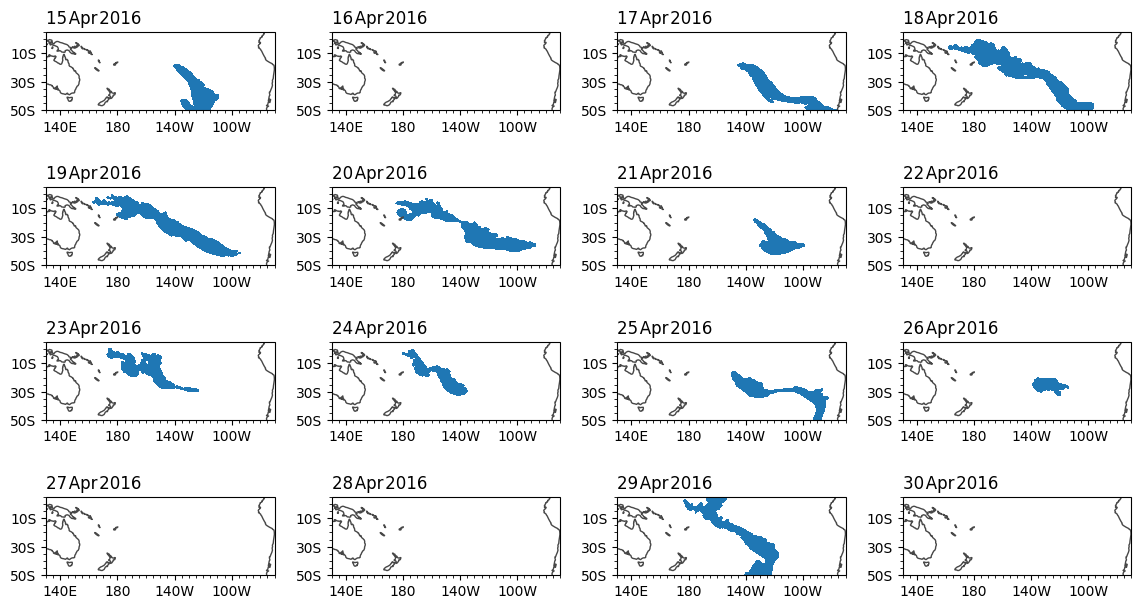

In [5]:
plot_time_evolution_blobs(
            blobs=cloud_bands_over_time,
            lons=lons,
            lats=lats,
            listofdates=listofdates,
            config=config,
            blobname="cloud_bands_over_time",
        )